<a href="https://colab.research.google.com/github/dkarakost/IDHV_Project/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:

# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
Lucas_dataset = "/content/LUCAS-SOIL-2018.csv"
df = pd.read_csv(Lucas_dataset)

According to this Dataset the:

**Depth** is the soil sampling depth (e.g., 0–20 cm or 20–30 cm)

**POINTID** is a unique identifier for the sampling point

**pH_CaCl2** is the soil pH measured in a calcium chloride solution (more stable than water pH)

**pH_H2O** is the soil pH measured in water

**EC** is the electrical conductivity of the soil, indicating salinity (in dS/m)

**OC** is the organic carbon content of the soil, related to fertility and structure

**P** is the phosphorus content in the soil, a vital nutrient for plant growth

**N** is the nitrogen content in the soil, essential for plant and microbial activity

**K** is the potassium content in the soil, crucial for plant metabolism

**NUTS_0** is the country-level code based on the NUTS (Nomenclature of Territorial Units for Statistics) classification

**NUTS_1** is the major socio-economic region code (first level NUTS region)

**NUTS_2** is the basic region code for regional policy implementation

**NUTS_3** is the small region code used for detailed geographical statistics

**TH_LAT** is the latitude coordinate of the sample location

**TH_LONG** is the longitude coordinate of the sample location

**SURVEY_DATE** is the date when the soil sample was collected

**Elev** is the elevation of the sampling site in meters above sea level

**LC** is the land cover class code at the sample site

**LU** is the land use class code at the sample site

**LC0_Desc** is the descriptive label for level 0 land cover class (broadest level)

**LC1_Desc** is the descriptive label for level 1 land cover class (more detailed)

**LU1_Desc** is the descriptive label for level 1 land use class




In [68]:
#check the 5 rows of the data
df.head(5)


,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,AT113,47.150238,16.134212,06-07-18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,AT113,47.274272,16.175359,06-07-18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,AT113,47.123260,16.289693,02-06-18,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,AT113,47.245693,16.357506,06-07-18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,AT113,47.296372,16.416782,05-07-18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry


In [69]:
df.shape

(18984, 27)

In [70]:
df.isnull().sum()


,0
Depth,0
POINTID,0
pH_CaCl2,1
pH_H2O,1
EC,9
OC,1
CaCO3,7763
P,26
N,1
K,1


In [71]:
# delete the columns that we don't need for training
df=df.drop(columns=["OC (20-30 cm)", "CaCO3 (20-30 cm)", "Ox_Al", "Ox_Fe", "CaCO3"])

In [8]:
#checking again for null values
df.isnull().sum()

,0
Depth,0
POINTID,0
pH_CaCl2,1
pH_H2O,1
EC,9
OC,1
P,26
N,1
K,1
NUTS_0,0


In [72]:
clean_df = df.dropna()
clean_df.isnull().sum()

,0
Depth,0
POINTID,0
pH_CaCl2,0
pH_H2O,0
EC,0
OC,0
P,0
N,0
K,0
NUTS_0,0


In [73]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18950 entries, 0 to 18983
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        18950 non-null  object 
 1   POINTID      18950 non-null  int64  
 2   pH_CaCl2     18950 non-null  float64
 3   pH_H2O       18950 non-null  float64
 4   EC           18950 non-null  float64
 5   OC           18950 non-null  object 
 6   P            18950 non-null  object 
 7   N            18950 non-null  object 
 8   K            18950 non-null  object 
 9   NUTS_0       18950 non-null  object 
 10  NUTS_1       18950 non-null  object 
 11  NUTS_2       18950 non-null  object 
 12  NUTS_3       18950 non-null  object 
 13  TH_LAT       18950 non-null  float64
 14  TH_LONG      18950 non-null  float64
 15  SURVEY_DATE  18950 non-null  object 
 16  Elev         18950 non-null  int64  
 17  LC           18950 non-null  object 
 18  LU           18950 non-null  object 
 19  LC0_Desc 

In [74]:
clean_df.tail(2)

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,P,N,K,NUTS_0,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
18982,0-20 cm,32783636,5.3,5.90,10.42,38.3,7.3,3.1,1907.9,UK,...,UKN13,54.759266,-6.358608,05-06-18,122,E20,U370,Grassland,Grassland without tree/shrub cover,Residential
18983,0-20 cm,33023682,4.7,4.97,141.70,98.7,33.7,10.1,231.1,UK,...,UKN12,55.208730,-6.156597,28-06-18,143,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...


In [75]:
cleaned_df= clean_df.reset_index(drop=True)

In [76]:
cleaned_df.tail(2)

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,P,N,K,NUTS_0,...,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
18948,0-20 cm,32783636,5.3,5.90,10.42,38.3,7.3,3.1,1907.9,UK,...,UKN13,54.759266,-6.358608,05-06-18,122,E20,U370,Grassland,Grassland without tree/shrub cover,Residential
18949,0-20 cm,33023682,4.7,4.97,141.70,98.7,33.7,10.1,231.1,UK,...,UKN12,55.208730,-6.156597,28-06-18,143,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...


In [77]:
cleaned_df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'P', 'N', 'K',
       'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG',
       'SURVEY_DATE', 'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

As we saw above some of the columns are numeric and some are int or float. Now we want to convert the OC,N,P,K to numerical values

In [78]:
cleaned_df["OC"] = pd.to_numeric(cleaned_df["OC"], errors="coerce")

Check if the OC column is a numerical

In [79]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18950 entries, 0 to 18949
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        18950 non-null  object 
 1   POINTID      18950 non-null  int64  
 2   pH_CaCl2     18950 non-null  float64
 3   pH_H2O       18950 non-null  float64
 4   EC           18950 non-null  float64
 5   OC           18916 non-null  float64
 6   P            18950 non-null  object 
 7   N            18950 non-null  object 
 8   K            18950 non-null  object 
 9   NUTS_0       18950 non-null  object 
 10  NUTS_1       18950 non-null  object 
 11  NUTS_2       18950 non-null  object 
 12  NUTS_3       18950 non-null  object 
 13  TH_LAT       18950 non-null  float64
 14  TH_LONG      18950 non-null  float64
 15  SURVEY_DATE  18950 non-null  object 
 16  Elev         18950 non-null  int64  
 17  LC           18950 non-null  object 
 18  LU           18950 non-null  object 
 19  LC0_

Then we continue with the rest

In [80]:
cleaned_df["P"] = pd.to_numeric(cleaned_df["P"], errors="coerce")
cleaned_df["N"] = pd.to_numeric(cleaned_df["N"], errors="coerce")
cleaned_df["K"] = pd.to_numeric(cleaned_df["K"], errors="coerce")
cleaned_df["Elev"] = pd.to_numeric(cleaned_df["Elev"], errors="coerce")

Drop the unnecessary columns like NUTS_0 , NUTS_1 etc...

In [81]:
cleaned_df["C/N"] = cleaned_df["OC"]/ cleaned_df["N"]

In [82]:
cleaned_df.tail(5)

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,P,N,K,NUTS_0,...,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc,C/N
18945,0-20 cm,32643634,6.0,6.13,91.40,51.4,92.2,5.3,1036.9,UK,...,54.713343,-6.563749,24-07-18,50,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,9.698113
18946,0-20 cm,32703676,4.9,5.14,51.78,73.9,81.6,6.9,225.0,UK,...,55.091488,-6.625119,02-08-18,34,B55,U111,Cropland,Temporary grassland,Agriculture (excluding fallow land and kitchen...,10.710145
18947,0-20 cm,32783608,5.5,5.94,22.40,63.7,101.9,6.7,569.5,UK,...,54.515104,-6.259448,18-06-18,50,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,9.507463
18948,0-20 cm,32783636,5.3,5.90,10.42,38.3,7.3,3.1,1907.9,UK,...,54.759266,-6.358608,05-06-18,122,E20,U370,Grassland,Grassland without tree/shrub cover,Residential,12.354839
18949,0-20 cm,33023682,4.7,4.97,141.70,98.7,33.7,10.1,231.1,UK,...,55.208730,-6.156597,28-06-18,143,E20,U111,Grassland,Grassland without tree/shrub cover,Agriculture (excluding fallow land and kitchen...,9.772277


In [119]:
New_df = cleaned_df.drop(columns=["NUTS_1", "NUTS_2", "NUTS_3", "LC0_Desc","LC1_Desc","LU1_Desc", "POINTID"])

Define the features and the Target variable or response

In [161]:
# Drop rows where target is NaN
df_cleaned = New_df.dropna(subset=["C/N"])

In [162]:
# Then proceed with selecting X and y
features = ["Depth", "pH_CaCl2", "pH_H2O", "EC", "OC", "P", "N", "K", "NUTS_0", "TH_LAT", "TH_LONG", "SURVEY_DATE", "Elev", "LC", "LU"]
X = df_cleaned[features]
Y = df_cleaned["C/N"]

One hot encoding. Turning categorical values to into multiple binary columns that the model can understand.

In [163]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18912 entries, 0 to 18949
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        18912 non-null  object 
 1   pH_CaCl2     18912 non-null  float64
 2   pH_H2O       18912 non-null  float64
 3   EC           18912 non-null  float64
 4   OC           18912 non-null  float64
 5   P            13960 non-null  float64
 6   N            18912 non-null  float64
 7   K            18876 non-null  float64
 8   NUTS_0       18912 non-null  object 
 9   TH_LAT       18912 non-null  float64
 10  TH_LONG      18912 non-null  float64
 11  SURVEY_DATE  18912 non-null  object 
 12  Elev         18912 non-null  int64  
 13  LC           18912 non-null  object 
 14  LU           18912 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.3+ MB


In [116]:
X = pd.get_dummies(New_df, columns = ["Depth", "NUTS_0","SURVEY_DATE","LC","LU"],drop_first= True)

In [164]:
# Identify categorical features
categorical_cols = ["Depth", "NUTS_0", "LC", "LU", "SURVEY_DATE"]


In [165]:
# Label encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    X.loc[:, col] = le.fit_transform(X[col])

In [166]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18912 entries, 0 to 18949
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        18912 non-null  object 
 1   pH_CaCl2     18912 non-null  float64
 2   pH_H2O       18912 non-null  float64
 3   EC           18912 non-null  float64
 4   OC           18912 non-null  float64
 5   P            13960 non-null  float64
 6   N            18912 non-null  float64
 7   K            18876 non-null  float64
 8   NUTS_0       18912 non-null  object 
 9   TH_LAT       18912 non-null  float64
 10  TH_LONG      18912 non-null  float64
 11  SURVEY_DATE  18912 non-null  object 
 12  Elev         18912 non-null  int64  
 13  LC           18912 non-null  object 
 14  LU           18912 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.3+ MB


Spliting the data to y and x


In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Try to train the model

In [168]:
model = RandomForestRegressor(n_estimators = 100, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [175]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


MAE: 0.7283
MSE: 2.7297
RMSE: 1.6522
R²: 0.9310


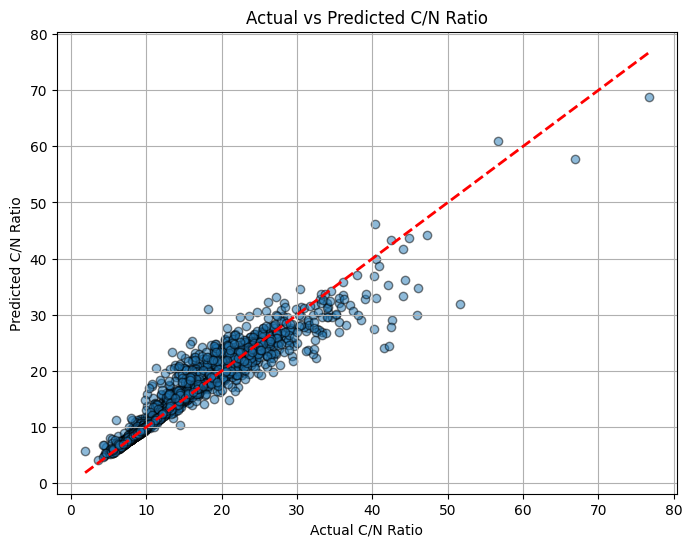

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Reference line
plt.xlabel("Actual C/N Ratio")
plt.ylabel("Predicted C/N Ratio")
plt.title("Actual vs Predicted C/N Ratio")
plt.grid(True)
plt.show()


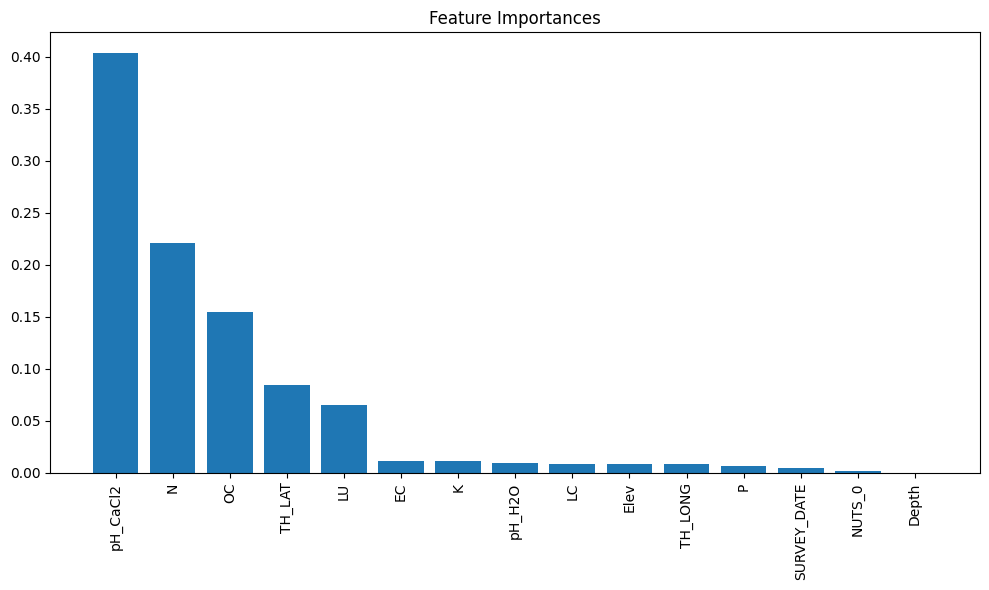

In [177]:
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()
